## **EDA :** Weather AUS

#### _Rain in Australia_

🟠 `on work`

---

1. **Identification générale**
    * Structure
    * Données cibles
    * Types de données
    * Contenu des données
    * Préparation
    * Conclusion
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
3. **Analyse bivariée**
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
    * Statistiques
4. **Finalisation**
    * Conclusion
    * Traitements

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pingouin as pg

**User Code**

In [2]:
draw = False

**Notebook setup**

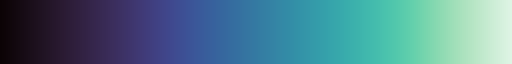

In [59]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
palette_c = [
    '#b8e600', # Sunny
    '#00bfff' # Rainy
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, icefire ...
sns.color_palette("mako", as_cmap=True)

**Weather AUS**

[Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [4]:
weather_file_path = './_datasets/weatherAUS_data.csv'
weather_data = pd.read_csv(weather_file_path)

weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**Notes**
* `Wet Season` : approx. du 1<sup>er</sup> novembre au 30 avril
* `Dry Season` : approx. du 1<sup>er</sup> mai au 31 octobre

---
### **1.** Identification générale

##### **1.1** - Structure

In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##### **1.2** - Données cibles

In [6]:
# (!) - Content `Yes`, `No` and `nan`
weather_data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

##### **1.3** - Types de données

In [7]:
pd.DataFrame({
    'Quantité de valeurs': weather_data.dtypes.value_counts()
})

,Quantité de valeurs
float64,16
object,7


In [8]:
pd.DataFrame({
    'Valeurs minimums (float)': weather_data.select_dtypes(np.float64).min(),
    'Valeurs maximums (float)': weather_data.select_dtypes(np.float64).max()
}, dtype=np.float64)

,Valeurs minimums (float),Valeurs maximums (float)
MinTemp,-8.5,33.9
MaxTemp,-4.8,48.1
Rainfall,0.0,371.0
Evaporation,0.0,145.0
Sunshine,0.0,14.5
WindGustSpeed,6.0,135.0
WindSpeed9am,0.0,130.0
WindSpeed3pm,0.0,87.0
Humidity9am,0.0,100.0
Humidity3pm,0.0,100.0


In [9]:
weather_data.select_dtypes(np.object_)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
...,...,...,...,...,...,...,...
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No
145459,2017-06-25,Uluru,NaN,ESE,ESE,No,NaN


##### **1.4** - Contenu des données

Valeurs nulles

In [62]:
pd.DataFrame({
    'Quantité de valeurs nulles': weather_data.isnull().sum(),
    'Pourcentage de valeurs nulles': (weather_data.isnull().sum() / weather_data.shape[0]) * 100,
}).sort_values(by='Quantité de valeurs nulles', ascending=False)

,Quantité de valeurs nulles,Pourcentage de valeurs nulles
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [11]:
# (!) - Missings on numeric values
if draw :
    plt.figure(figsize=(26,26))
    plt.title("Valeurs manquantes dans les valeurs numériques\n")
    sns.heatmap(weather_data.select_dtypes(np.float64).isnull(), cbar=False)
    plt.show()

_HiRes graphic in `./_outputs` directory_

<img src="./_outputs/weatherAUS_missing_numerics.png" alt="visualization of missing numerics" title="Valeurs numériques manquantes" width="151" height="148">

In [12]:
# (!) - Missings on text values
if draw :
    plt.figure(figsize=(26,26))
    plt.title("Valeurs manquantes dans les valeurs textuelles\n")
    sns.heatmap(weather_data.select_dtypes(np.object_).isnull(), cbar=False)
    plt.show()

_HiRes graphic in `./_outputs` directory_

<img src="./_outputs/weatherAUS_missing_texts.png" alt="visualization of missing texts" title="Valeurs textuelles manquantes" width="151" height="148">

Valeurs uniques

In [13]:
weather_data.select_dtypes(np.object_).nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [14]:
weather_data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [15]:
weather_data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [16]:
weather_data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [17]:
weather_data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [18]:
# (!) - Special case for 'Cloud**'
display(
    weather_data['Cloud9am'].unique(),
    weather_data['Cloud3pm'].unique()
)
weather_data[['Cloud9am', 'Cloud3pm']].describe()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

,Cloud9am,Cloud3pm
count,89572.000000,86102.000000
mean,4.447461,4.509930
std,2.887159,2.720357
min,0.000000,0.000000
25%,1.000000,2.000000
50%,5.000000,5.000000
75%,7.000000,7.000000
max,9.000000,9.000000


In [19]:
weather_data.loc[(weather_data['Cloud9am'].isnull()) & (weather_data['Cloud3pm'].isnull()), ['Cloud9am', 'Cloud3pm']]

,Cloud9am,Cloud3pm
1,NaN,NaN
3,NaN,NaN
5,NaN,NaN
...,...,...
145455,NaN,NaN
145456,NaN,NaN
145457,NaN,NaN


In [20]:
# (!) - Special case for 'Rainfall'
weather_data[['Rainfall']].describe()

,Rainfall
count,142199.000000
mean,2.360918
std,8.478060
min,0.000000
25%,0.000000
50%,0.000000
75%,0.800000
max,371.000000


Valeurs dupliquées

In [21]:
# [!] - I don't know and I won't searching for...

##### **1.5** - Préparation

In [22]:
# (!) - Extract column names for variables
continous = weather_data.select_dtypes(np.float64).columns.to_list()
continous.remove('Cloud9am')
continous.remove('Cloud3pm')
continous.remove('Rainfall') # [!] - Specific case...

discretes = ['Cloud9am', 'Cloud3pm']

categoricals = weather_data.select_dtypes(np.object_).columns.to_list()
categoricals.remove('RainTomorrow')

print(continous)
print(discretes)
print(categoricals)

['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Cloud9am', 'Cloud3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


##### **1.6** - Conclusion

> —
>
> ✔️ Les entrées liées à **Sydney** et **SydneyAirport**, ainsi que **Melbourne** et **MelbourneAirport** seront probablement fusionnées ; ou seulement une de chaque sera supprimée.
>
> ✔️ Les entrées enregistrées aux heures `*_9am` et `*_3pm` seront probablement fusionnées et moyennées ; ou seulement une de chaque sera conservée. Ainsi que les `MinTemp` et `MaxTemp`
>
> ✔️ La variable `Rainfall` sera probablement supprimée puisqu'elle affiche une description statistique farfelue.
>
> ✔️ Les variables `Sushine` et `Evaporation` comportent presque 50% de valeurs nulles.
> 
> —

---
### **2.** Analyse univariée

##### **2.1** - Cible

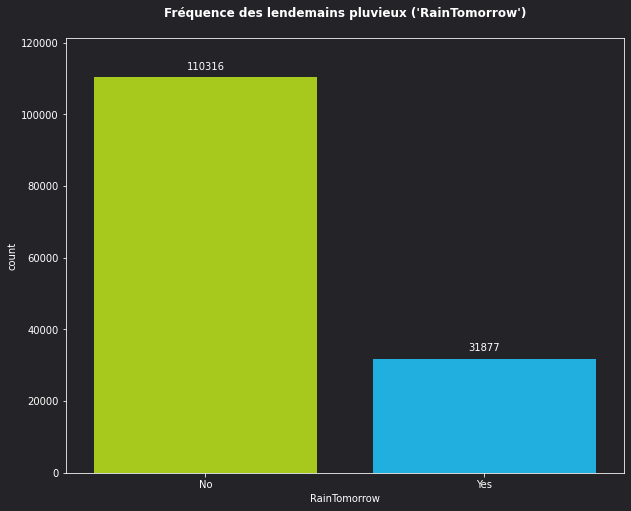

In [60]:
hgt = weather_data['RainTomorrow'].value_counts().max()

plt.figure(figsize=(10, 8))
plt.title("Fréquence des lendemains pluvieux ('RainTomorrow')\n")
ax = sns.countplot(data=weather_data.sort_values('RainTomorrow'), x='RainTomorrow', palette=palette_c)
ax.bar_label(ax.containers[0], padding=6)
plt.ylim(top=hgt*1.1)
plt.show()

In [24]:
cnt = weather_data[['RainTomorrow']].groupby('RainTomorrow').value_counts()
pct = (cnt / weather_data.shape[0]) * 100

pd.DataFrame({
    'Quantité lendemains pluvieux': cnt,
    'Pourcentage lendemains pluvieux': pct
}).reset_index()

,RainTomorrow,Quantité lendemains pluvieux,Pourcentage lendemains pluvieux
0,No,110316,75.839406
1,Yes,31877,21.914616


**Observations**

> —
> 
> ❕ Environ **76 %** du dataset sont des **lendemains pluvieux**.
> 
> ❓ _Quelle est la fréquence des lendemains pluvieux par rapport aux `RainToday` ? Quels étaient le taux `Humidity` moyen, le volume de `Rainfall`, l'intensité `Cloud` moyenne ?_
>
> —

##### **2.2** - Variables quantitatives continues

Fréquences et densités

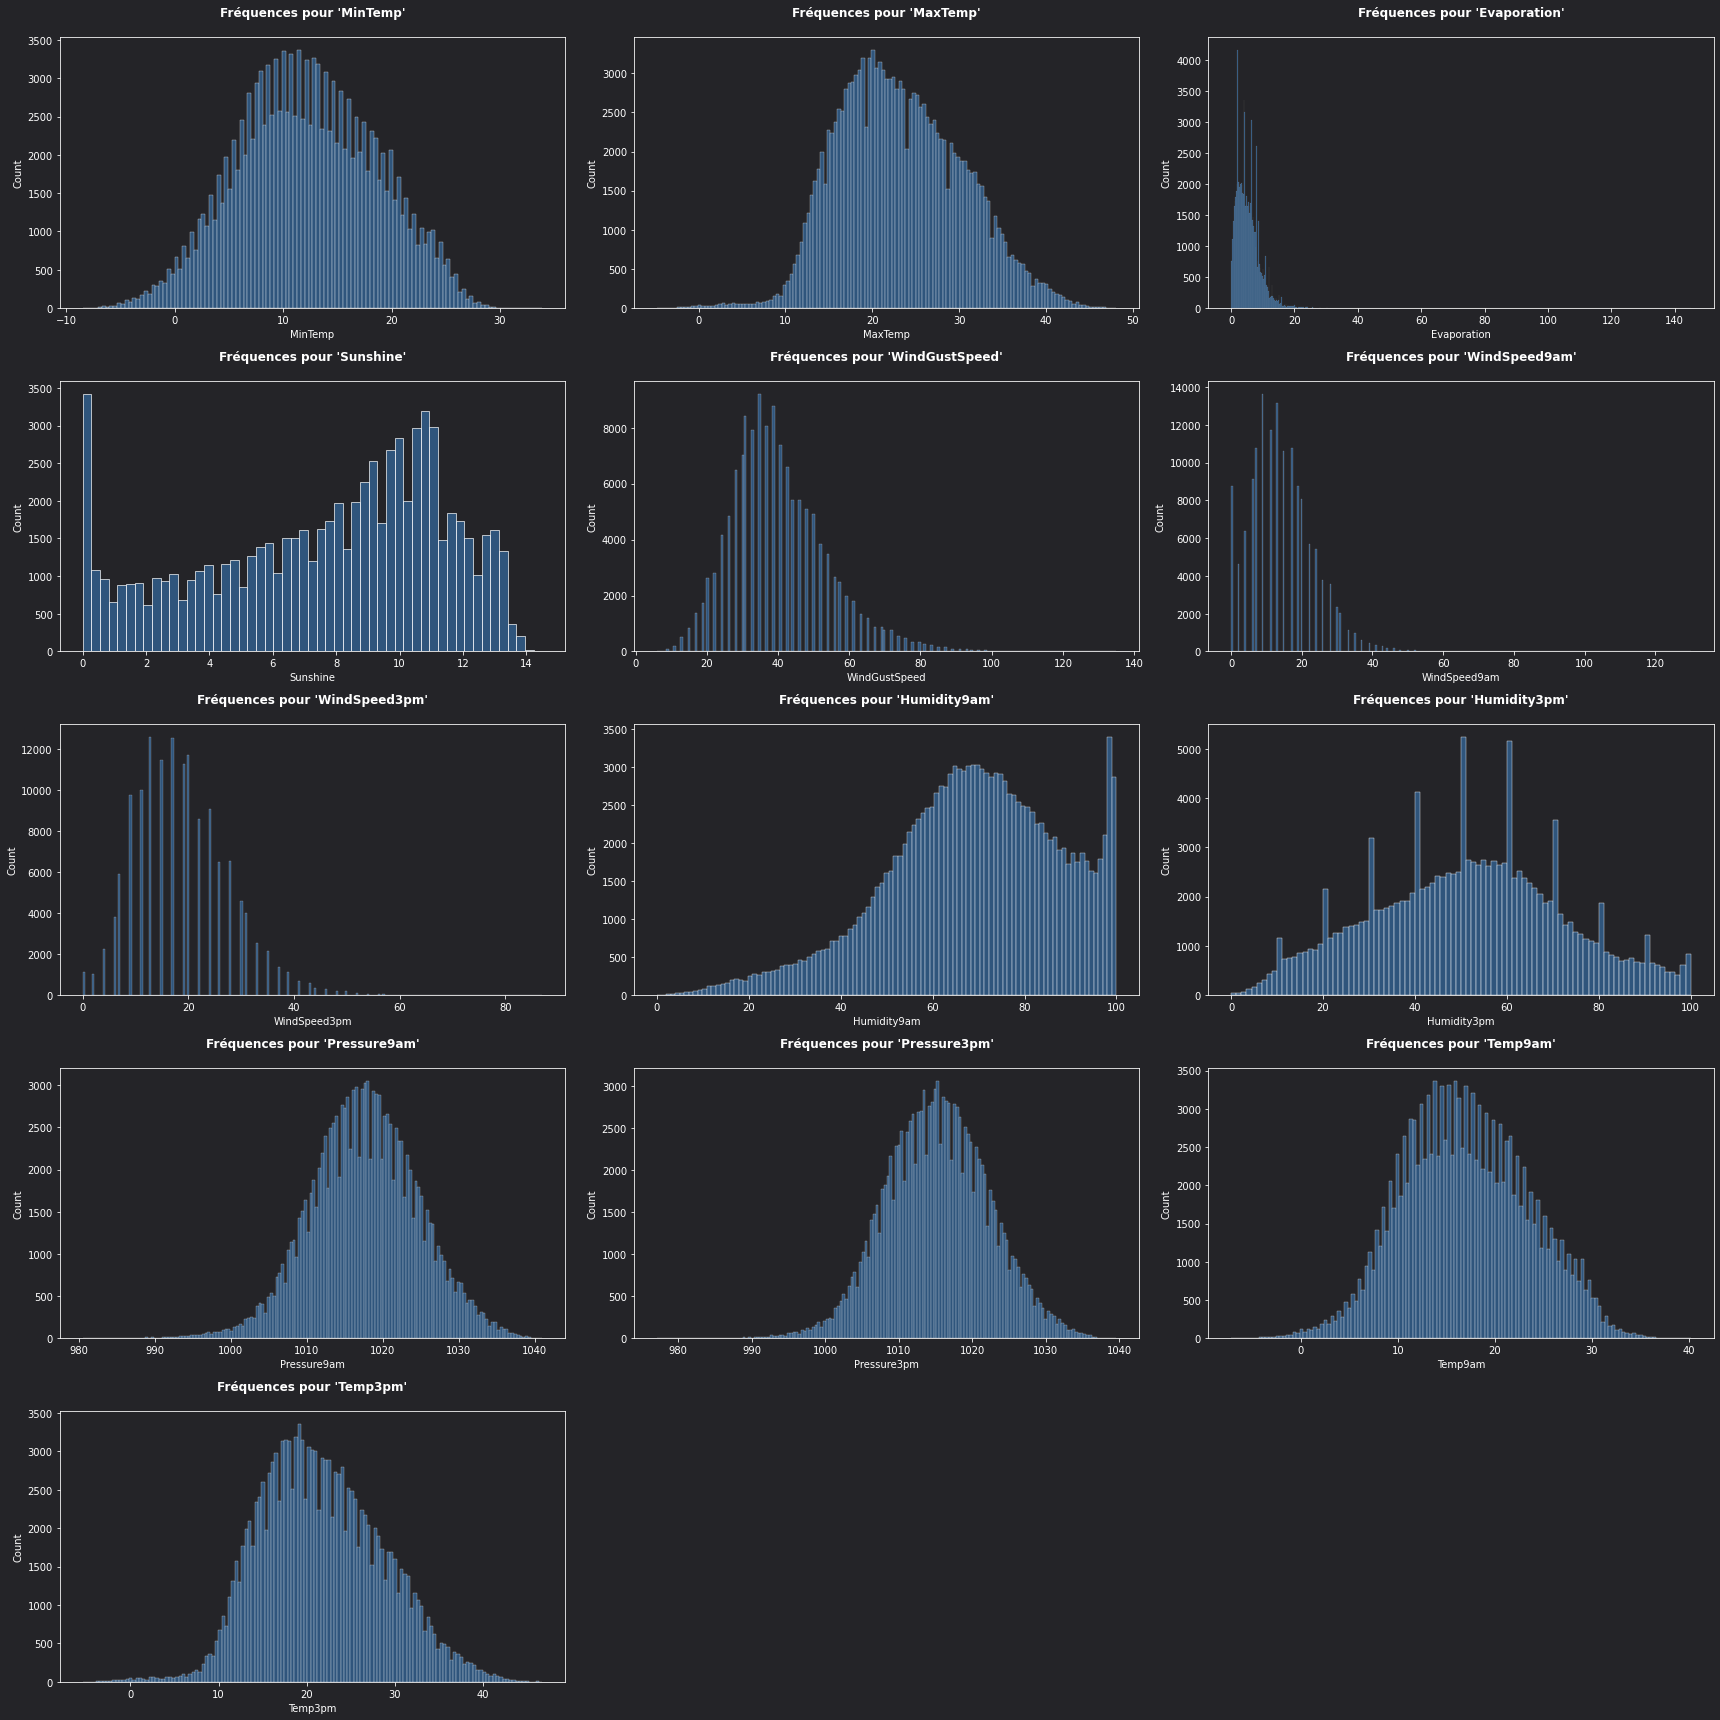

In [63]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=weather_data, x=col, fill=True, color=default_c)
plt.show()

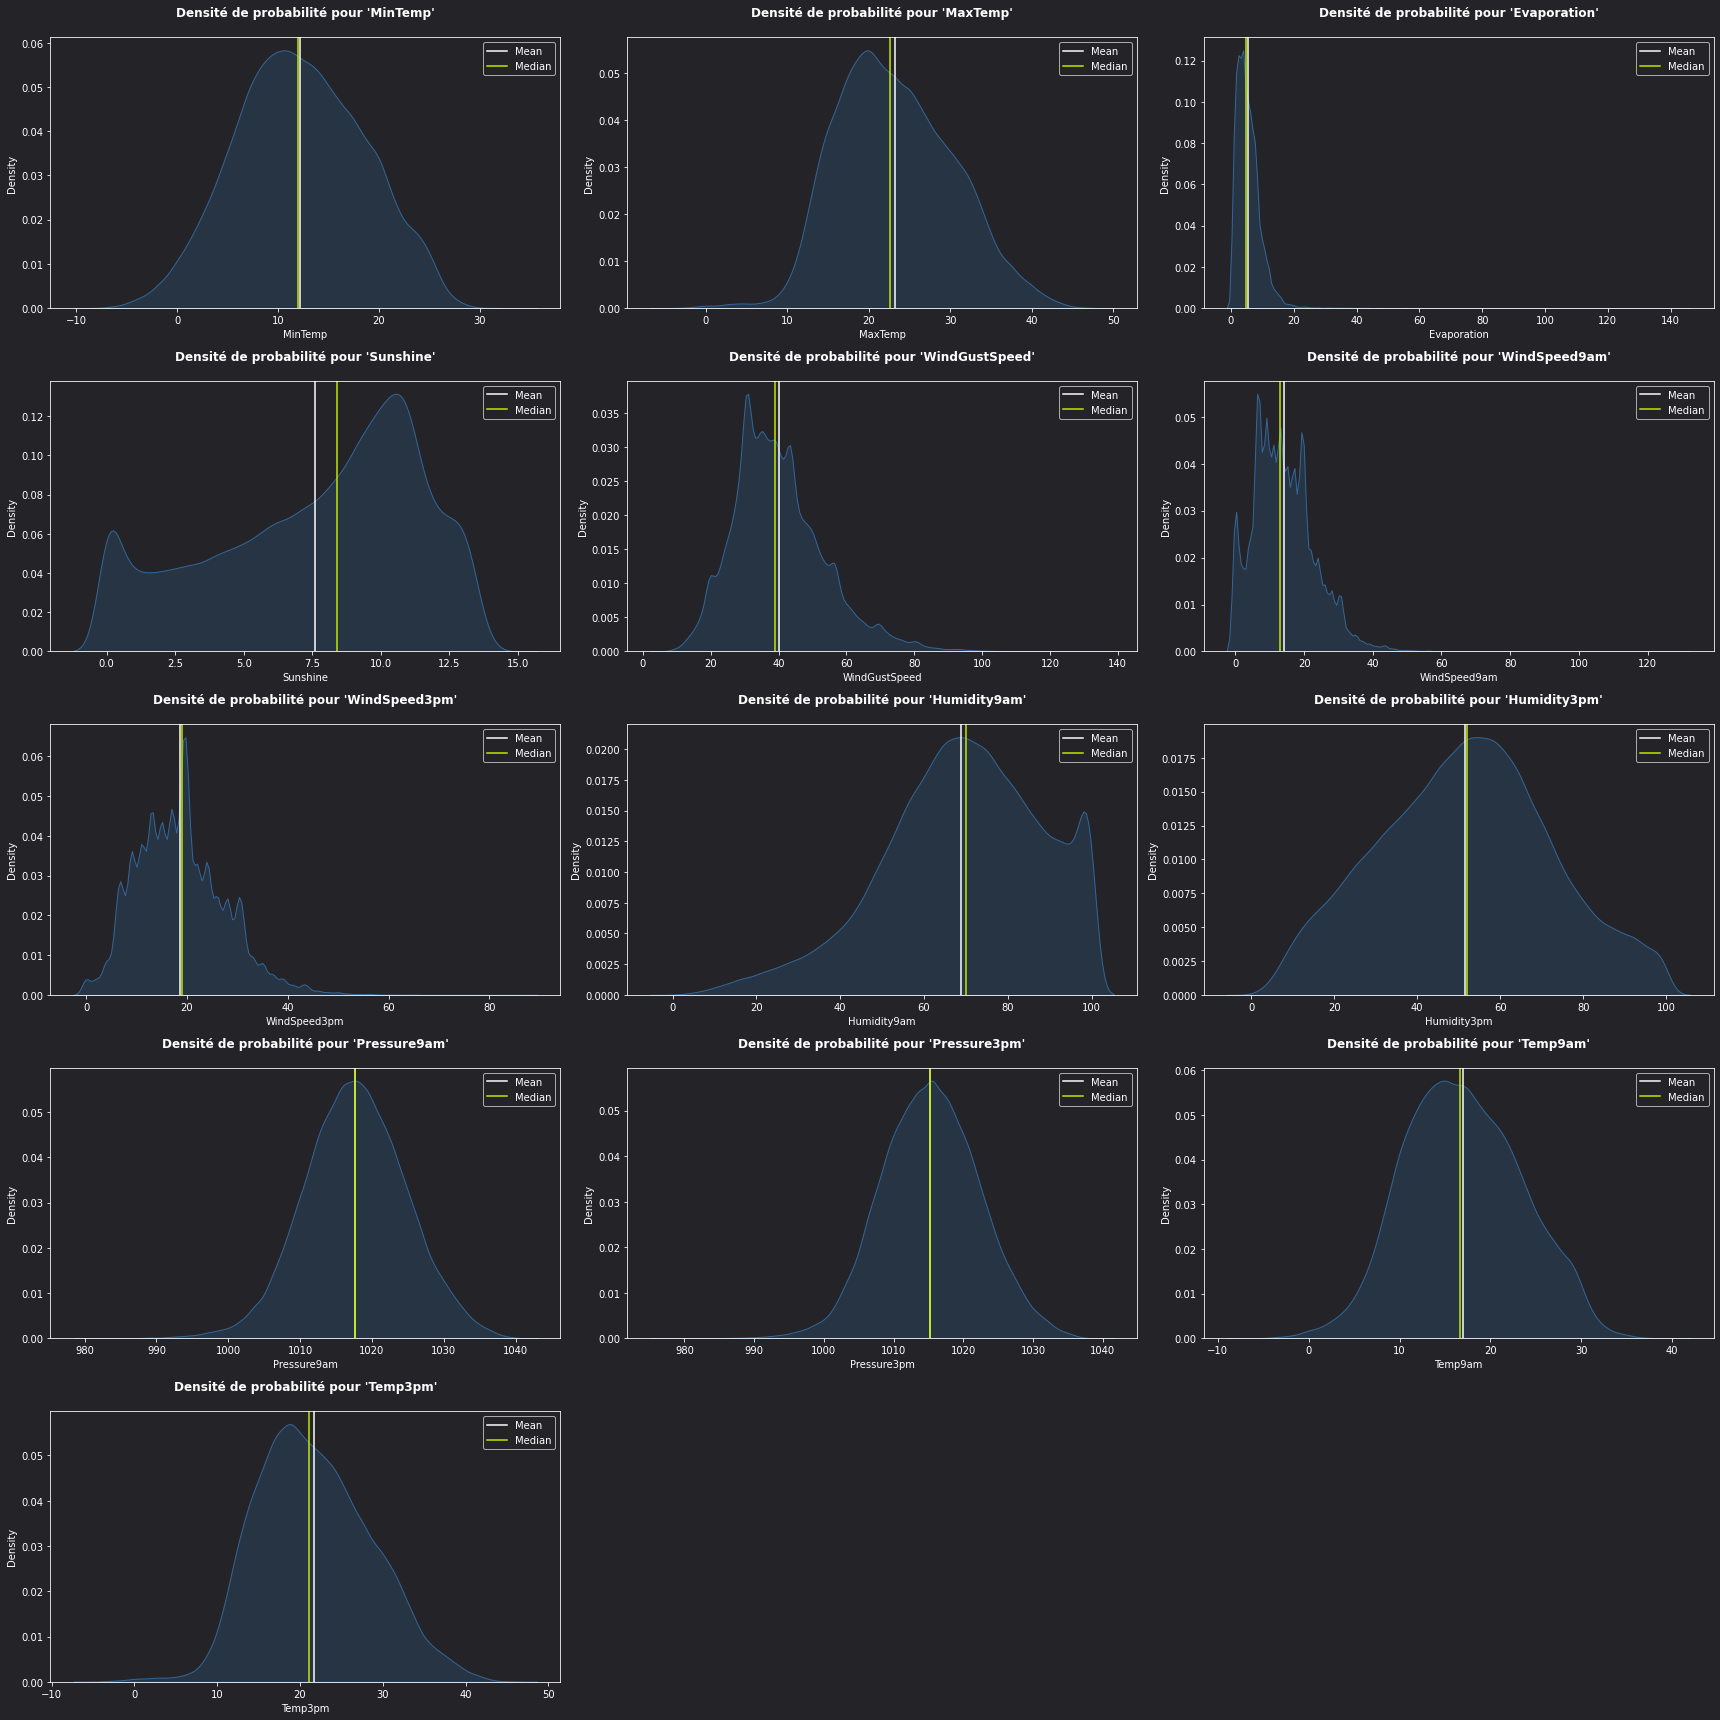

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
mean,12.194034,23.221348,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


In [64]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Densité de probabilité pour '{col}'\n")
    sns.kdeplot(data=weather_data, x=col, fill=True, color=default_c)
    plt.axvline(weather_data[col].mean(), c=mean_c, label='Mean')
    plt.axvline(weather_data[col].median(), c=median_c, label="Median")
    plt.legend()
plt.show()

weather_data[continous].describe().iloc[1:]

Variable `Rainfall`

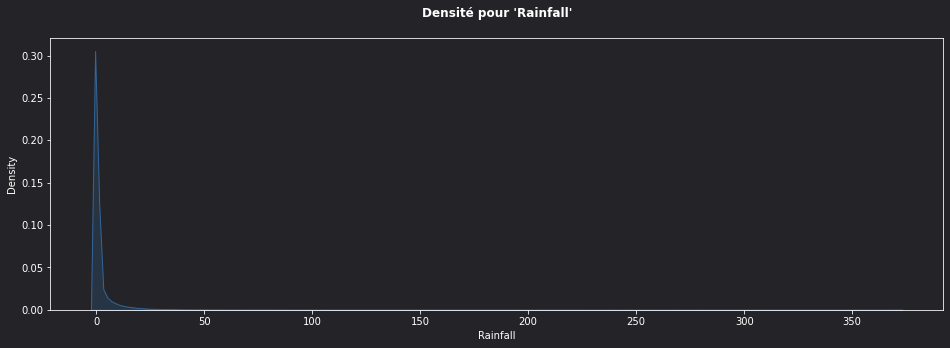

In [69]:
plt.figure(figsize=(16, 5))
plt.title(f"Densité pour 'Rainfall'\n")
sns.kdeplot(data=weather_data, x='Rainfall', fill=True, color=default_c)
plt.show()

Valeurs aberrantes

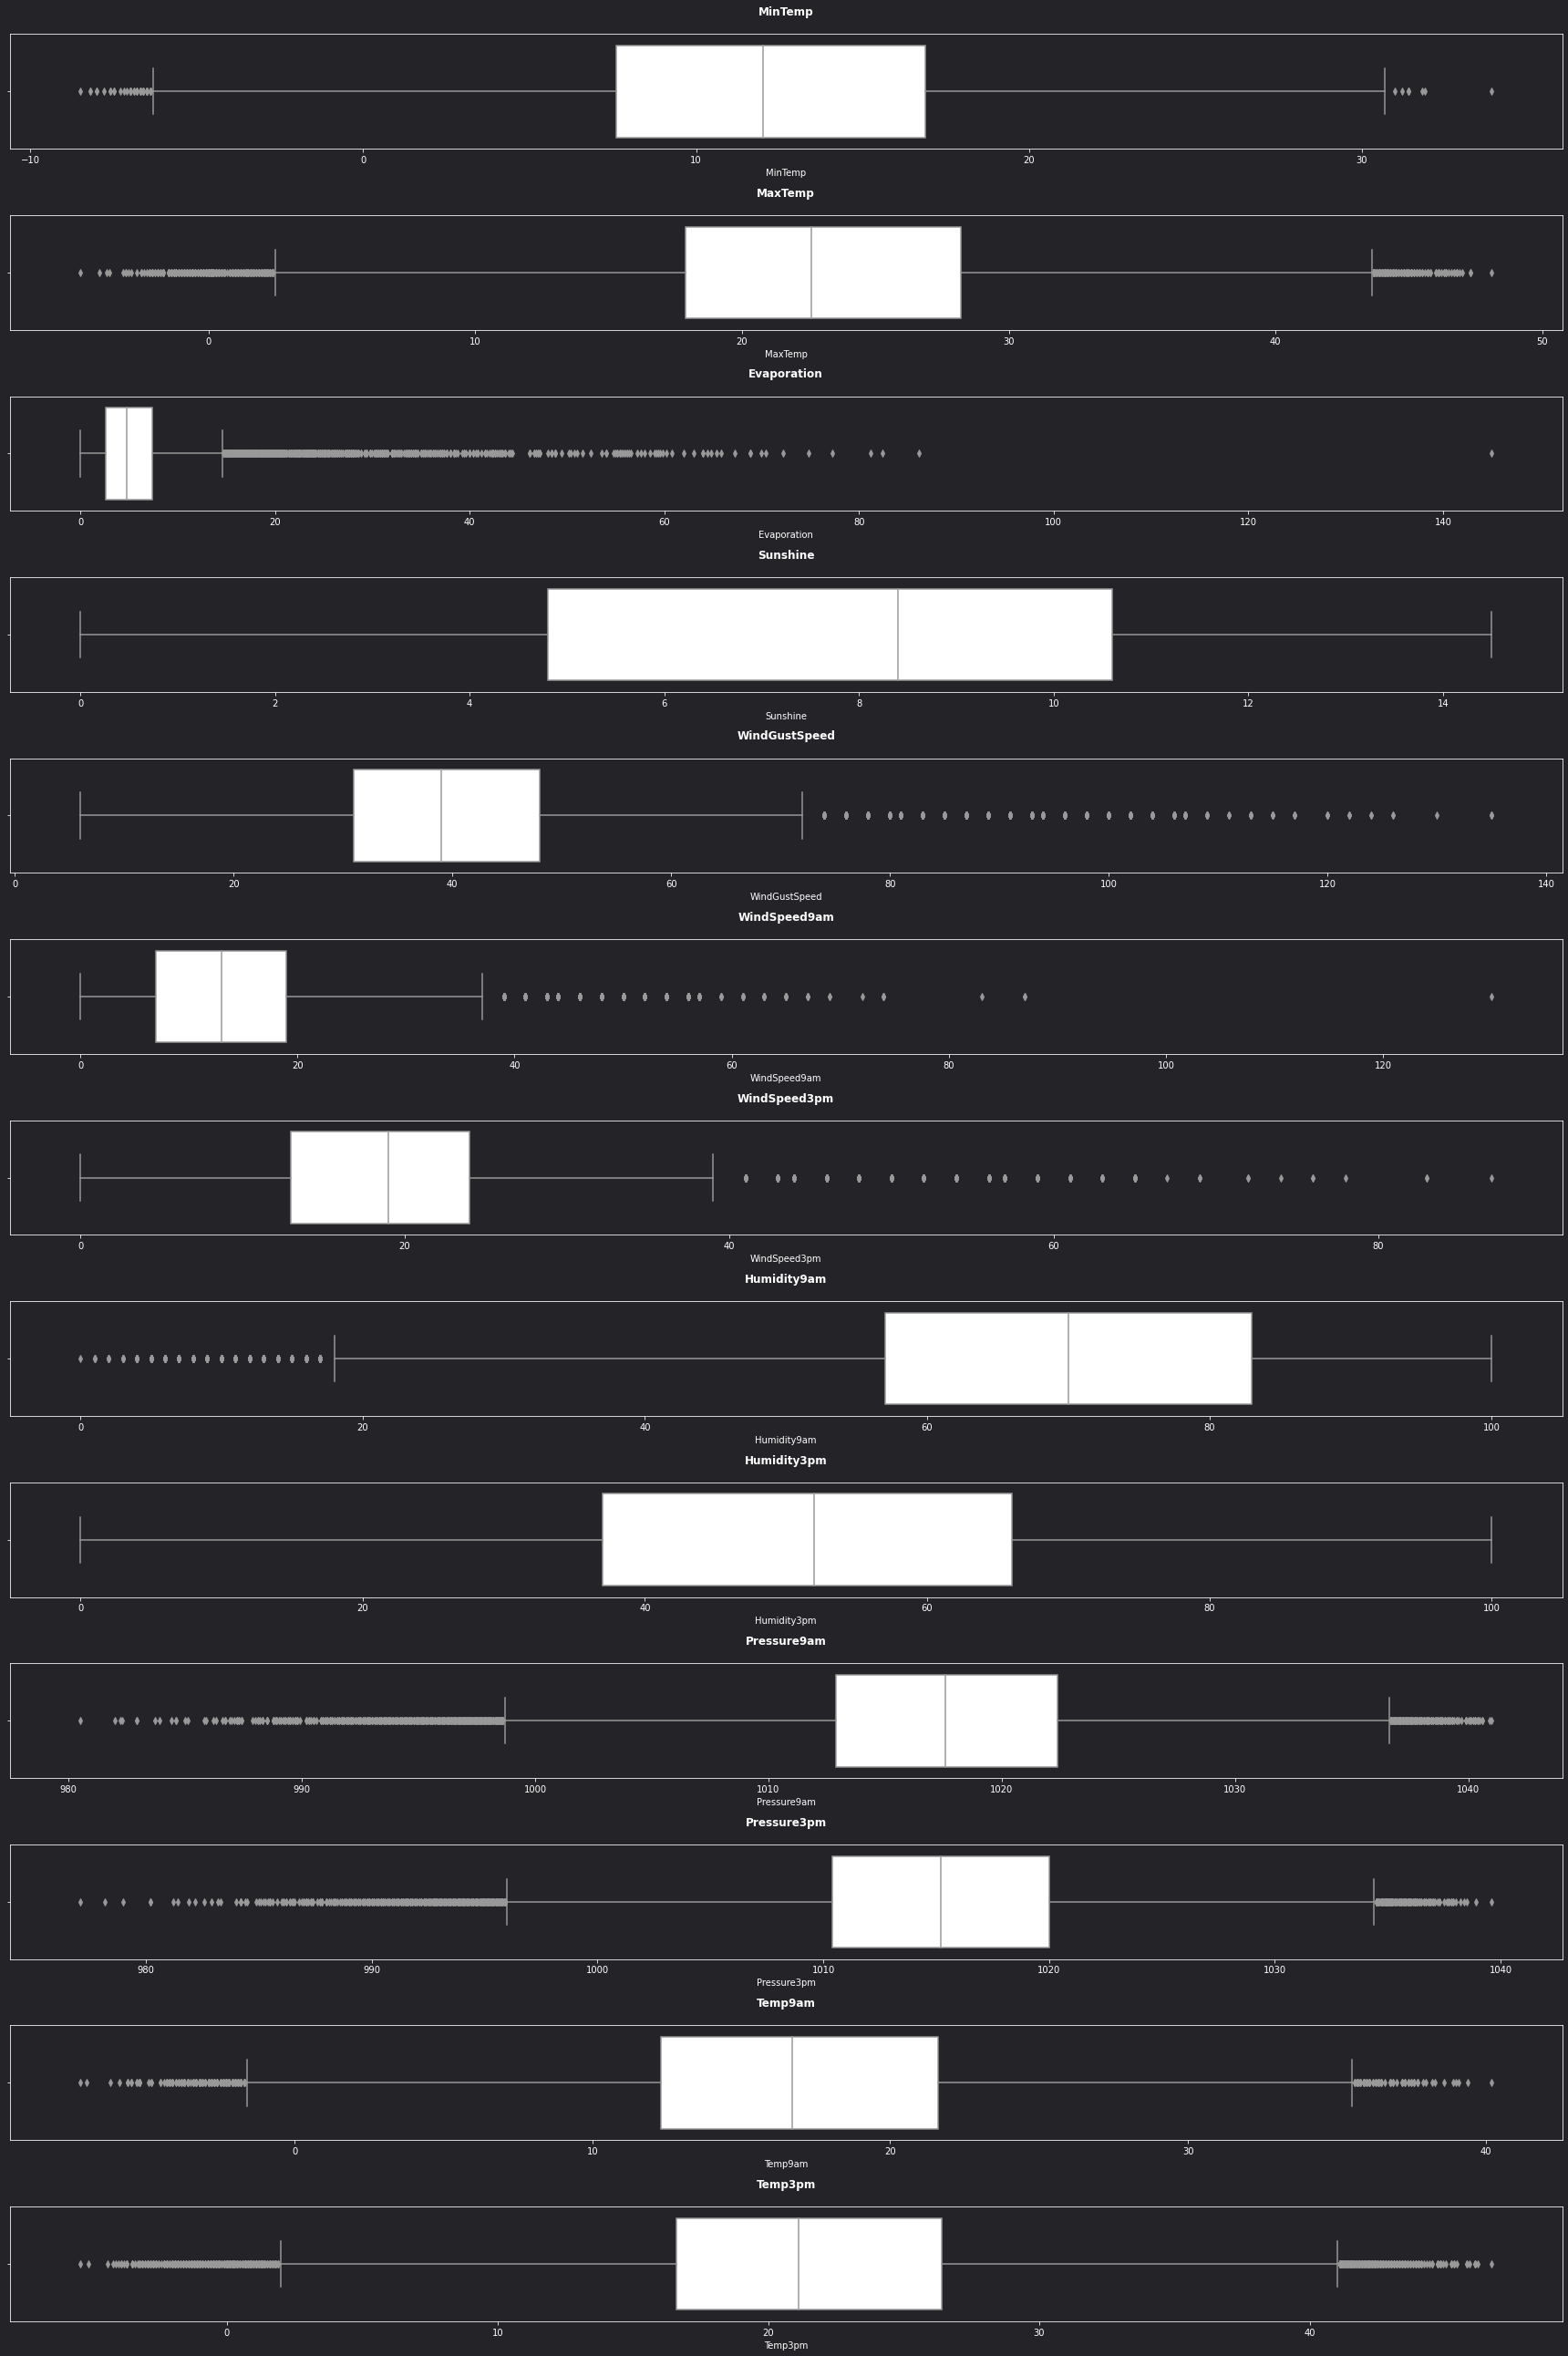

In [66]:
plt.figure(figsize=(24, 36), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(13, 1, i+1)
    plt.title(f"{col}\n")
    sns.boxplot(data=weather_data, x=col, color="#FFFFFF")
plt.show()

In [67]:
q25 = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(.25)
q75 = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(.75)
iqr = q75 - q25
lows = q25 - (1.5 * iqr)
ups = q75 + (1.5 * iqr)

pd.DataFrame({
    'Limite inférieure': lows,
    'Limite suppérieure': ups,
})

,Limite inférieure,Limite suppérieure
MinTemp,-6.35,30.85
MaxTemp,2.45,43.65
Evaporation,-4.60,14.60
Pressure9am,998.65,1036.65
Pressure3pm,996.00,1034.40
Temp9am,-1.65,35.55
Temp3pm,1.90,41.10


In [30]:
print(f"Entrées où 'Evaporation' est supérieure à {ups['Evaporation']} :")
age_hi_outliers = weather_data.loc[weather_data['Evaporation'] > ups['Evaporation']].sort_values('Evaporation')

display(age_hi_outliers)

cnt = age_hi_outliers[['RainTomorrow']].groupby('RainTomorrow').value_counts()
pct = (cnt / weather_data.shape[0]) * 100 

pd.DataFrame({
    'Quantité : Evaporation > 14.6': cnt,
    'Pourcentage : Evaporation > 14.6': pct
}).reset_index()

Entrées dont 'Evaporation' est supérieur à 14.600000000000001 :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
27445,2009-10-06,Richmond,8.3,21.3,0.0,14.7,NaN,E,30.0,S,...,78.0,47.0,1020.6,1015.9,NaN,NaN,14.2,19.9,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
96578,2009-03-16,Adelaide,14.3,20.0,6.0,14.8,3.2,WSW,41.0,S,...,90.0,54.0,1018.6,1018.4,NaN,NaN,15.2,19.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106968,2013-01-07,Woomera,24.6,45.3,0.0,82.4,NaN,SE,74.0,ESE,...,22.0,9.0,1013.8,1009.4,0.0,1.0,31.8,44.0,No,No
8831,2016-11-11,Cobar,19.1,35.3,0.0,86.2,NaN,NNW,35.0,NW,...,NaN,NaN,1009.3,1004.6,NaN,NaN,26.7,34.1,No,No
42358,2016-12-19,Williamtown,15.3,23.9,58.2,145.0,NaN,NaN,NaN,NaN,...,72.0,52.0,1020.8,1017.0,8.0,1.0,19.1,23.0,Yes,No


,RainTomorrow,Quantité : Evaporation > 14.6,Pourcentage : Evaporation > 14.6
0,No,1735,1.192768
1,Yes,219,0.150557


**Observations**

> — 
> 
> ❕ Les valeurs de la variable `Rainfal` sont très (trop) incohérentes. La variable `Evaporation` présente une distribution très éloignée de la normale et beaucoup de valeurs aberrantes. 
> 
> —

##### **2.3** - Variables quantitatives discrètes

Fréquence

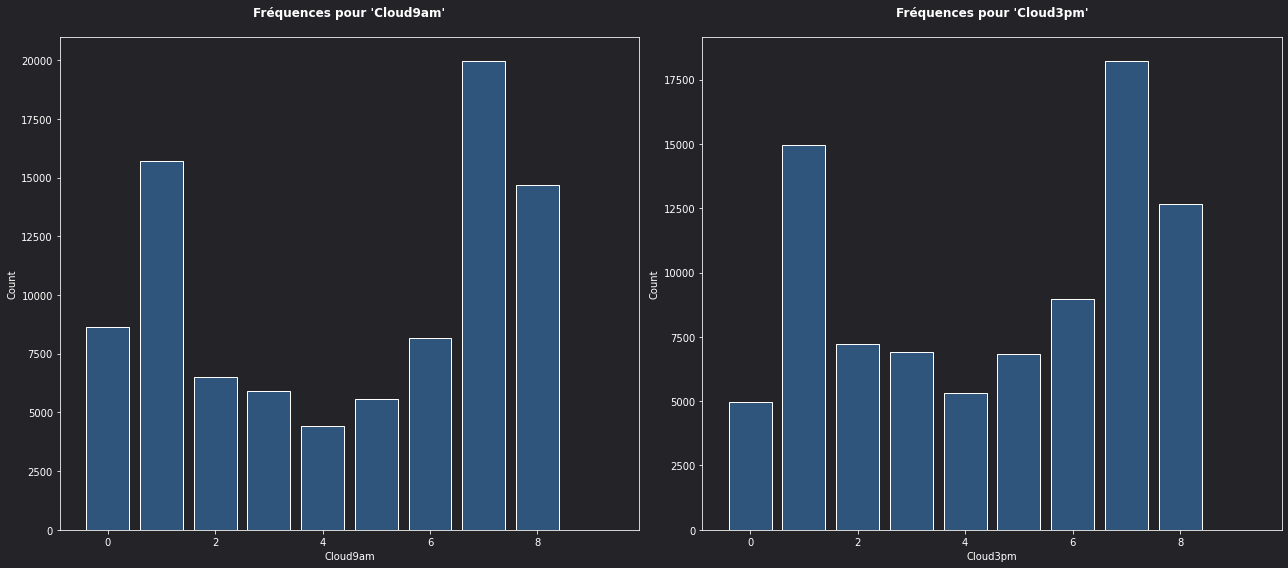

In [68]:
plt.figure(figsize=(18, 8), layout='tight')
for i, col in enumerate(discretes) :
    plt.subplot(1, 2, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=weather_data, x=col, fill=True, discrete=True, shrink=.8, color=default_c)
plt.show()

**Observation**

> — 
> 
> ❕ Les distributions de `Cloud9am` et `Cloud3pm` sont très similaires. 
>
> ❓ _Est-ce les variables `Cloud9am` et `Cloud3pm` présente une distribution différente lorsqu'elles sont croisées avec la cible ? Est-ce la variable `Cloud3pm` est plus corrélée avec la cible que la variable `Cloud9pm` ?_ 
> 
> —

##### **2.4** - Variables qualitatives

Fréquence

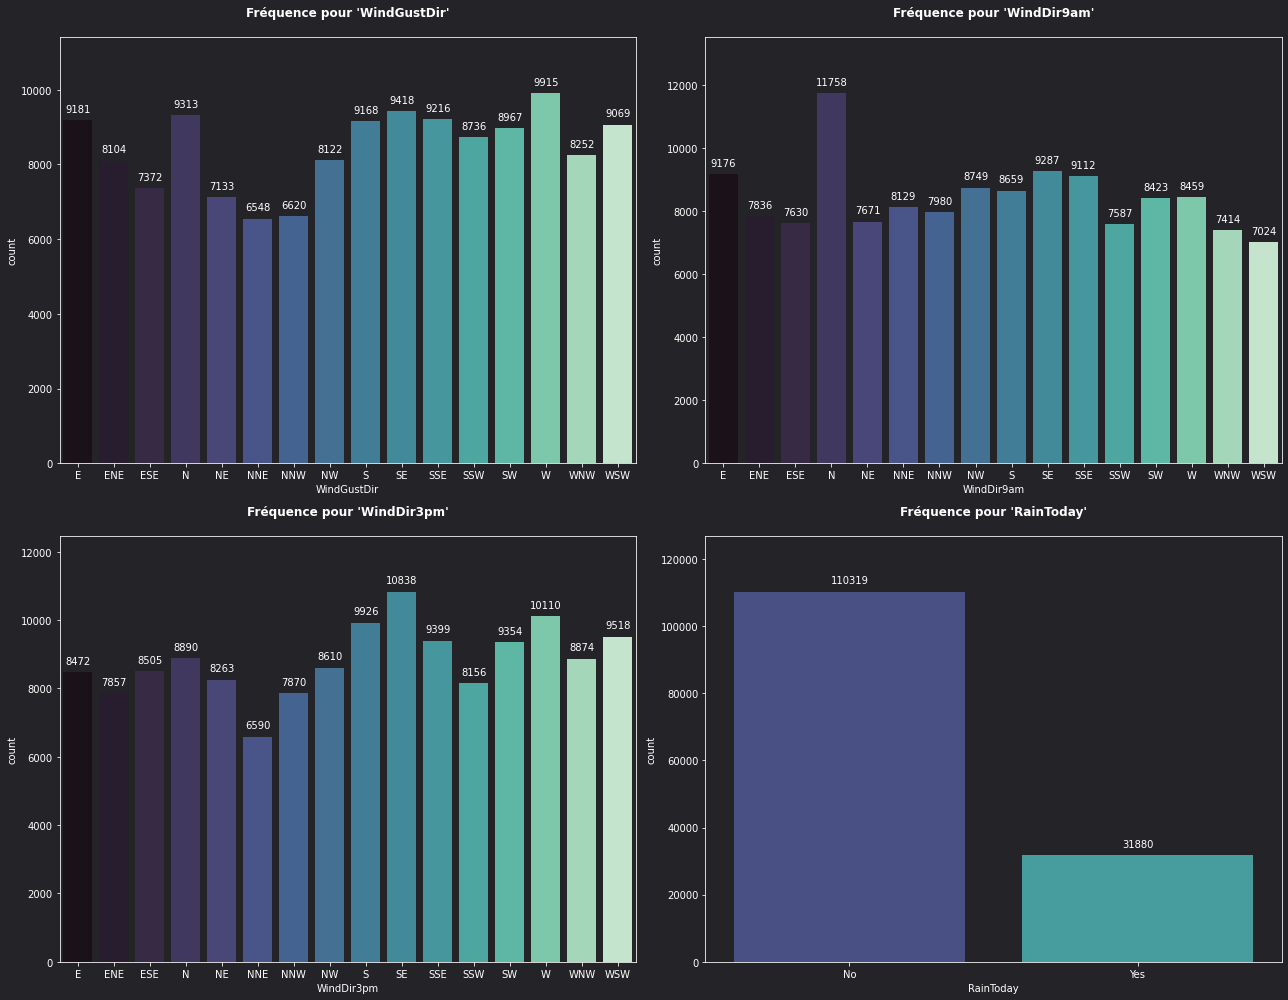

In [70]:
plt.figure(figsize=(18, 14), layout='tight')
for i, col in enumerate(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']) :
    hi_freq = weather_data[col].value_counts().max()
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquence pour '{col}'\n")
    ax = sns.countplot(data=weather_data.sort_values(col), x=col, palette='mako')
    ax.bar_label(ax.containers[0], padding=6)
    plt.ylim(top=hi_freq*1.15)
plt.show()

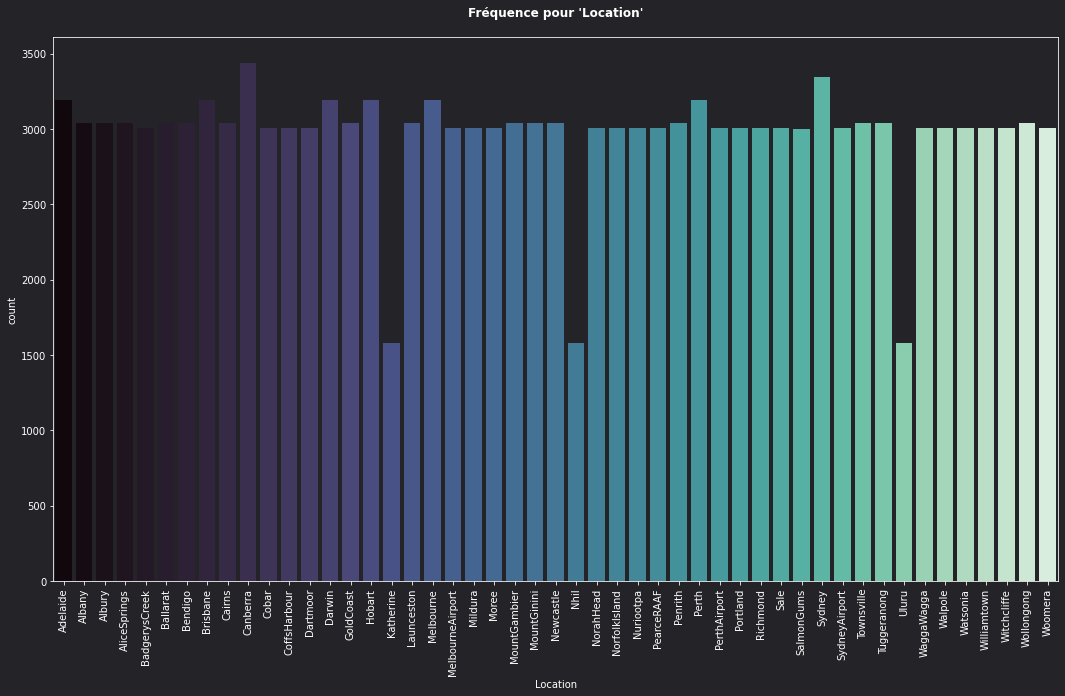

In [71]:
plt.figure(figsize=(18, 10))
plt.title(f"Fréquence pour 'Location'\n")
sns.countplot(data=weather_data.sort_values('Location'), x='Location', palette='mako')
plt.xticks(rotation=90)
plt.show()

**Observations**

> —
> 
> ❕ Les distributions de `WinDir9am` et `WinDir3pm` présente plusieurs différences. Hormis 3 villes, **Katherine**, **Nhil** et **Uluru**, où l'on a enregistré moitié moins de données, la distribution est assez uniforme pour la variable `Location`
>
> ❓ _Est-ce la variable `WinDir3pm` est plus corrélée avec la cible que la variable `WinDir9am` ? Est-ce qu'une moyenne de ces deux variables pourrait être mieux correlée que la variable `WinDir3pm` seule ?_ 
> 
> — 

---
### **3.** Analyse bivariée

##### **3.1** - Variables quantitatives continues

Distributions selon la cible

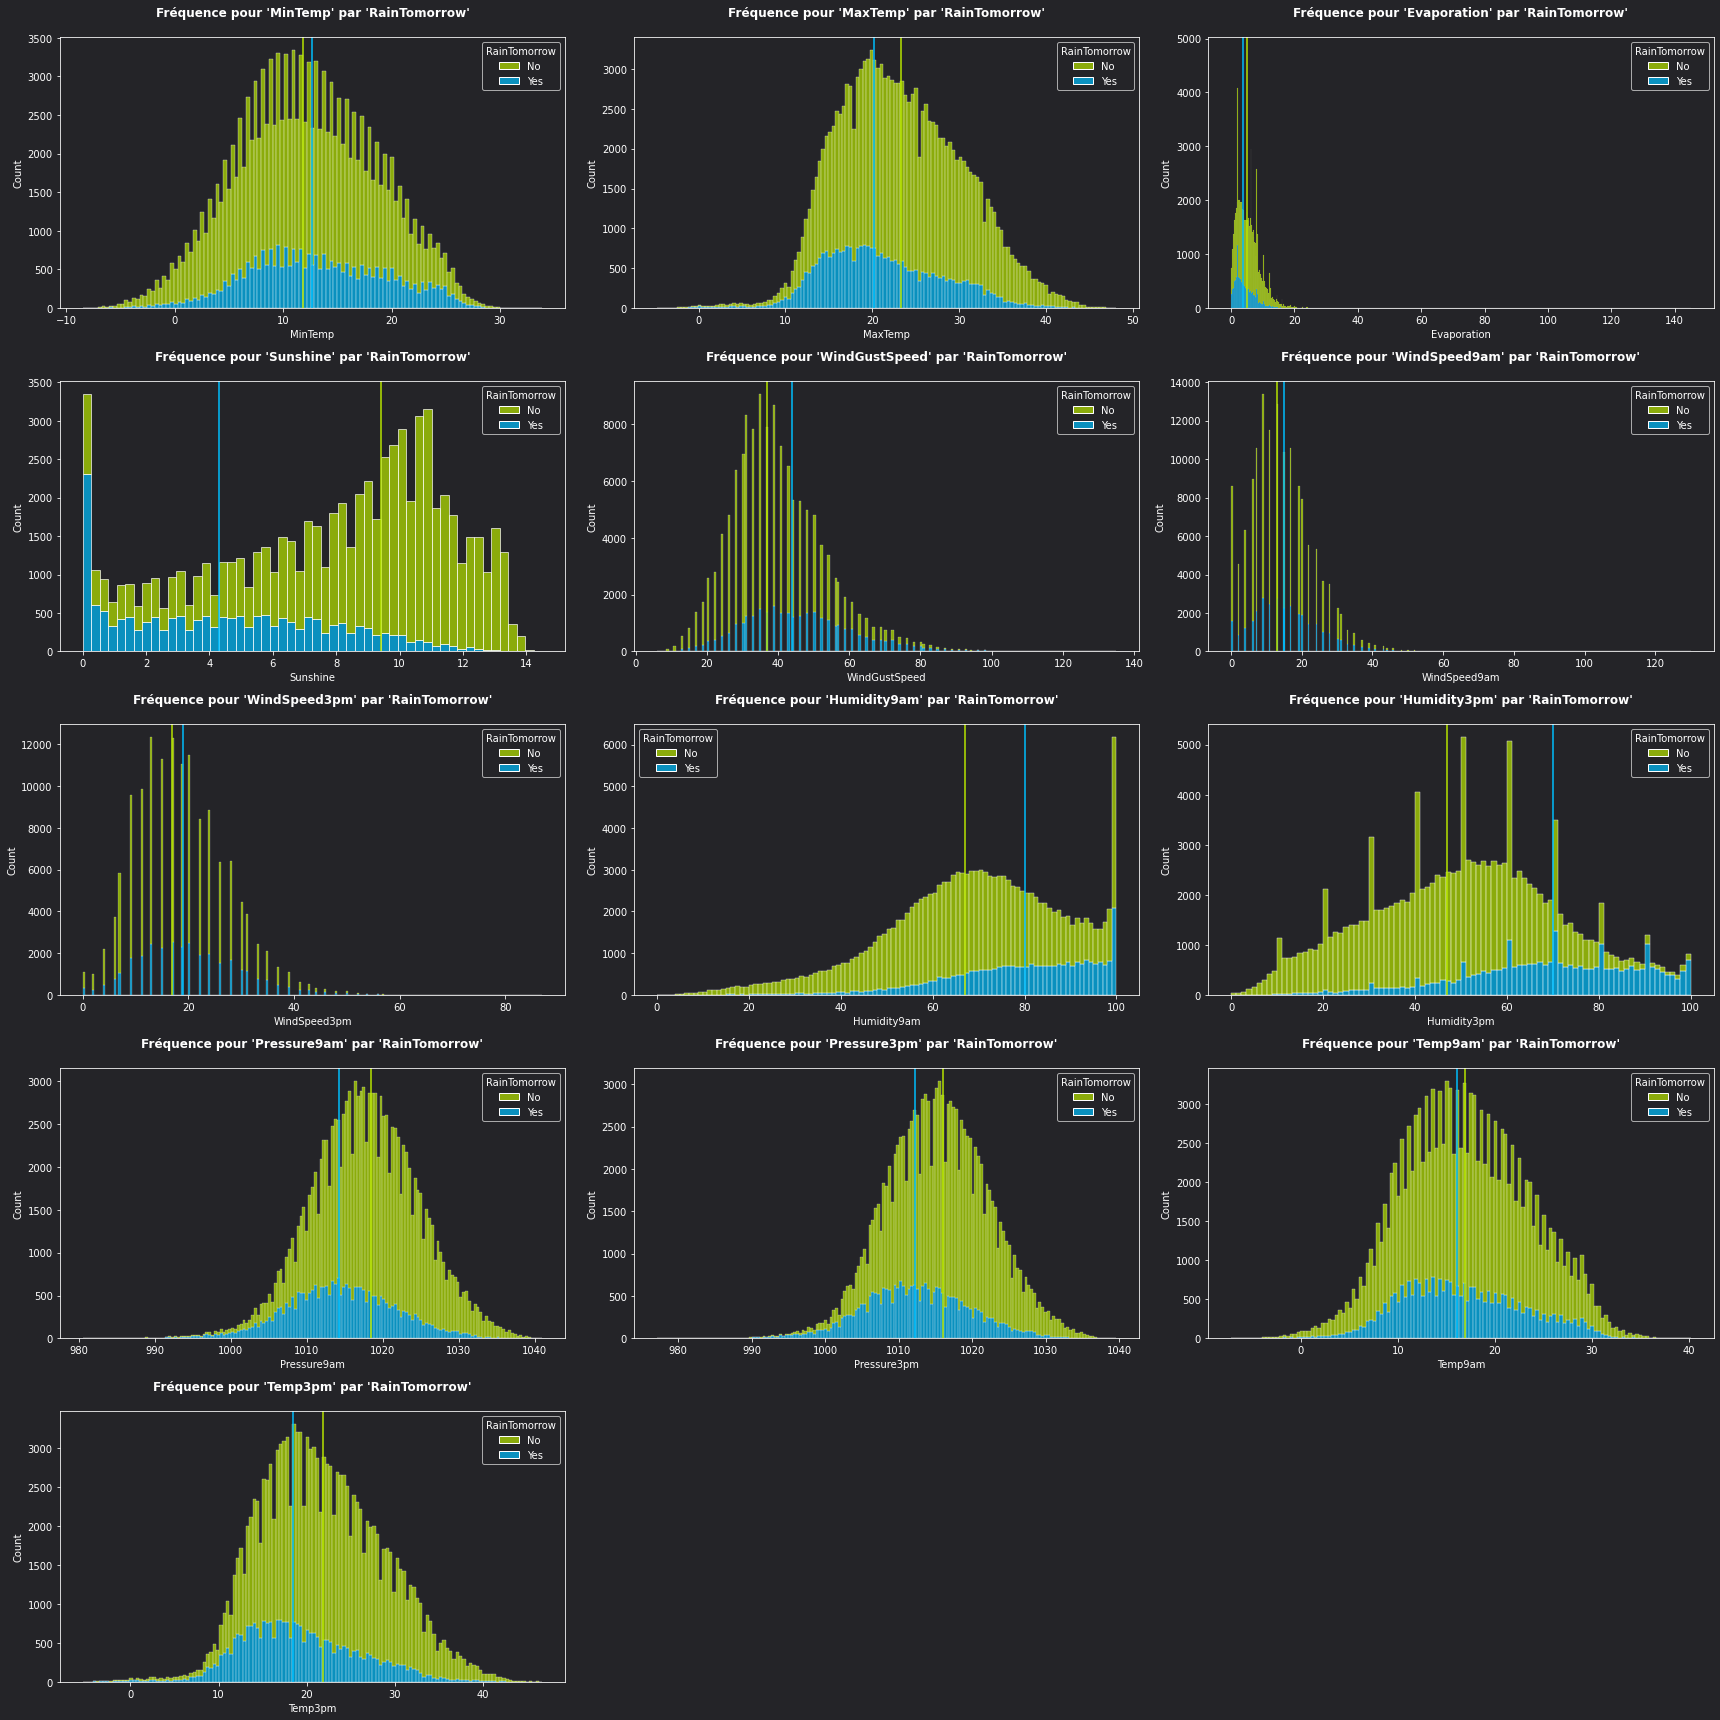

In [72]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Fréquence pour '{col}' par 'RainTomorrow'\n")
    sns.histplot(data=weather_data, x=col, hue='RainTomorrow', hue_order=['No', 'Yes'], multiple='stack', alpha=.7, palette=palette_c)
    plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'No', col].median(), c=palette_c[0])
    plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'Yes', col].median(), c=palette_c[1])

plt.show()

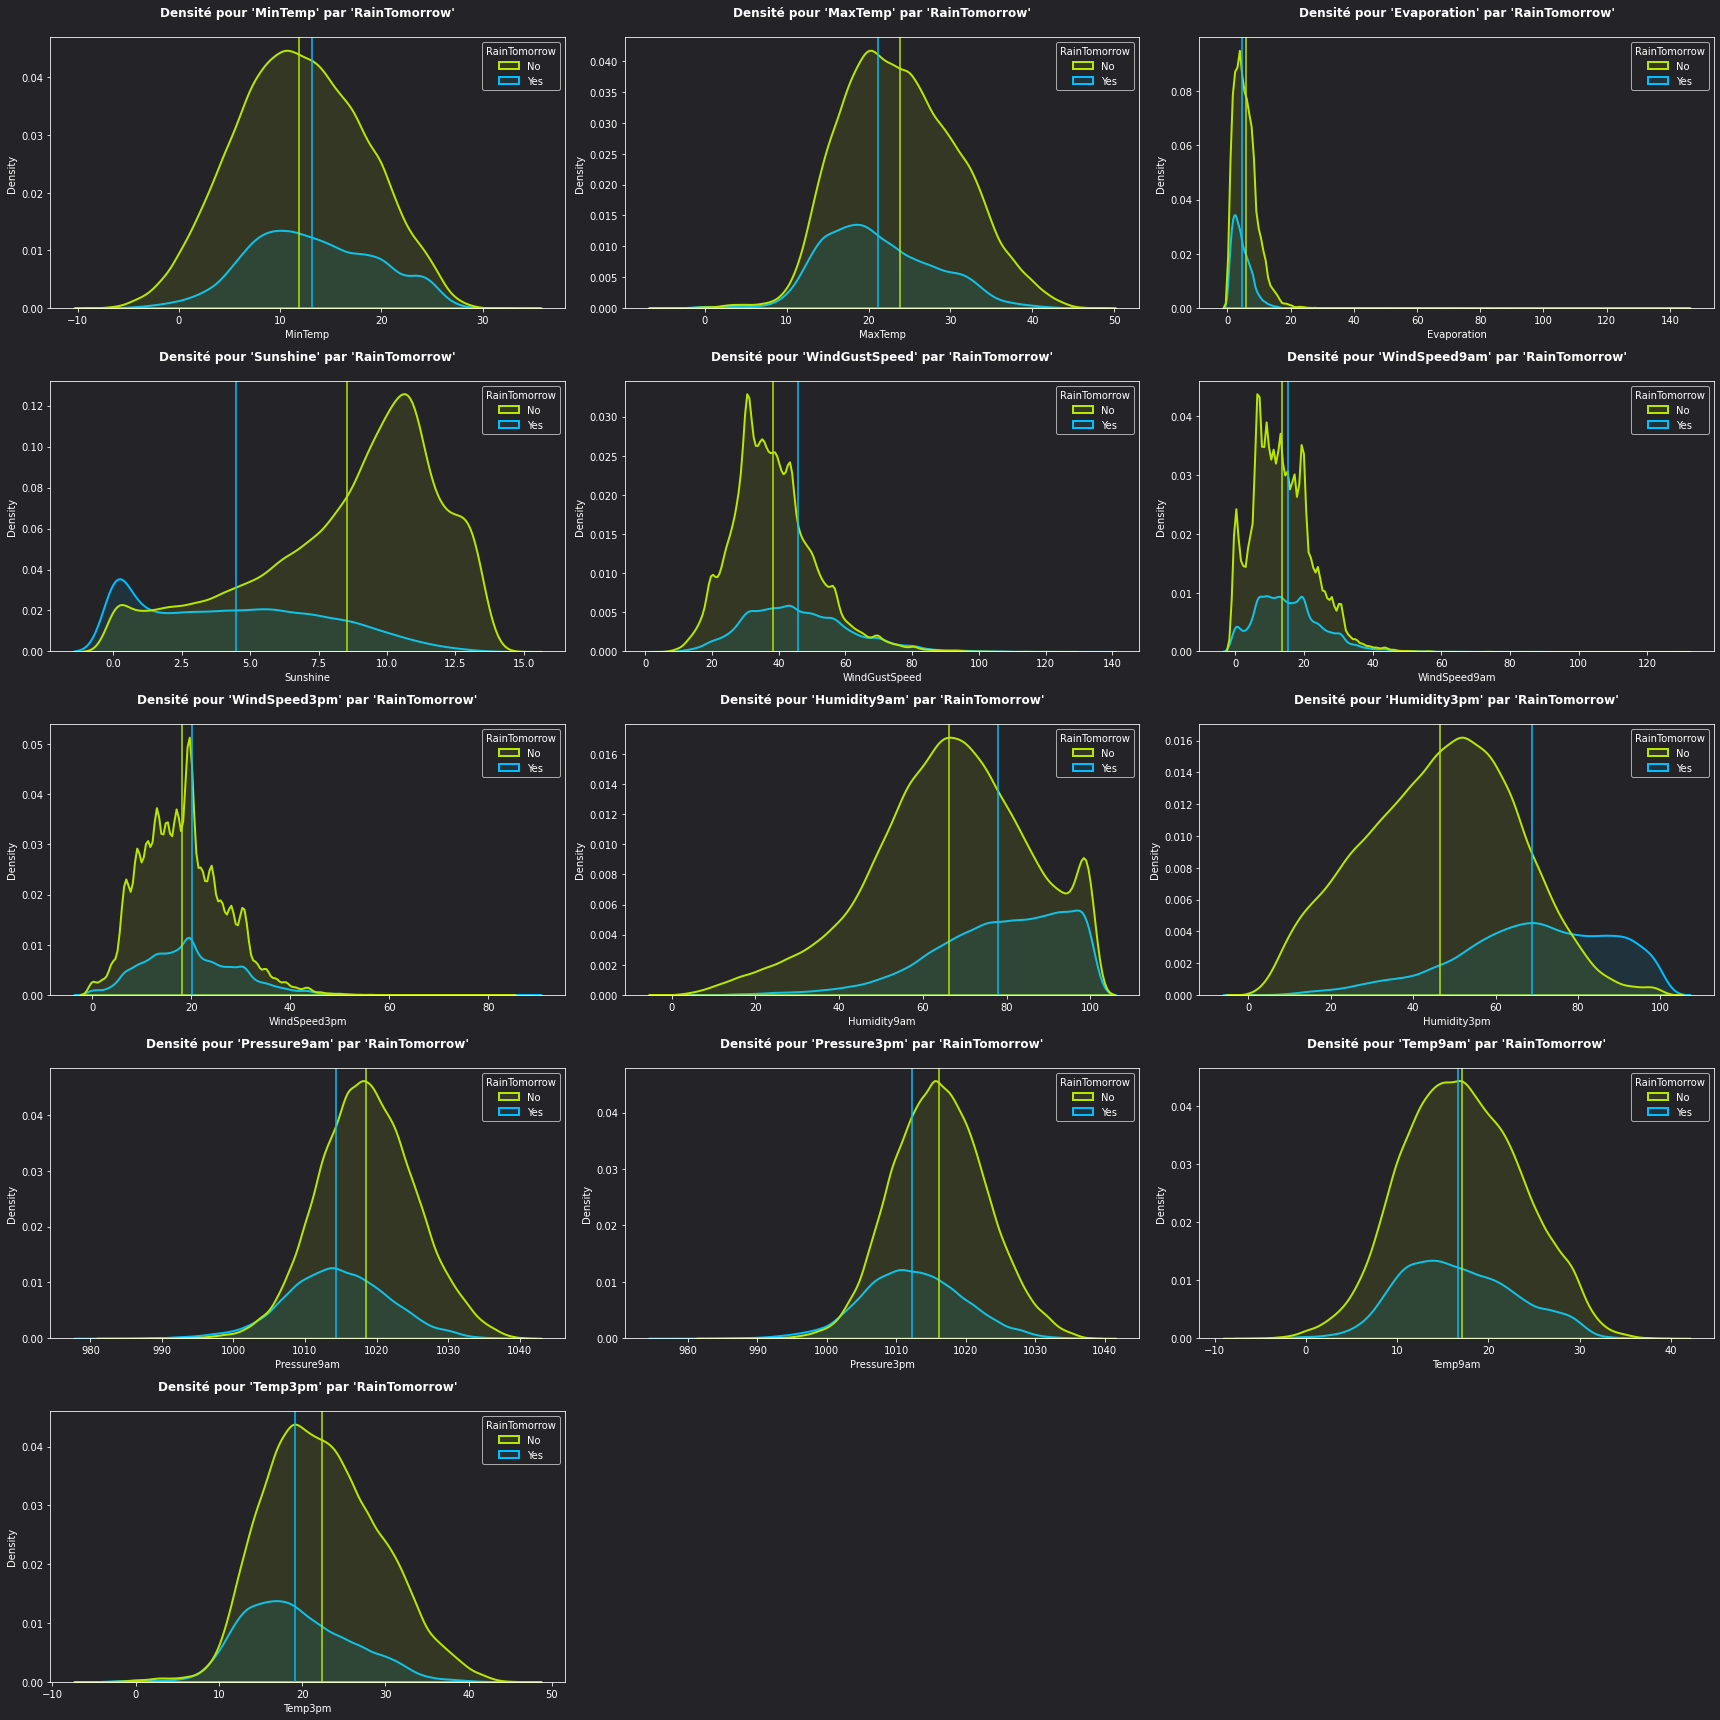

In [76]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Densité pour '{col}' par 'RainTomorrow'\n")
    sns.kdeplot(data=weather_data.sort_values('RainTomorrow'), x=col, hue='RainTomorrow', alpha=.1, linewidth=2, fill=True, palette=palette_c)
    plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'No', col].mean(), c=palette_c[0])
    plt.axvline(weather_data.loc[weather_data['RainTomorrow'] == 'Yes', col].mean(), c=palette_c[1])

plt.show()

Variable `Rainfall`

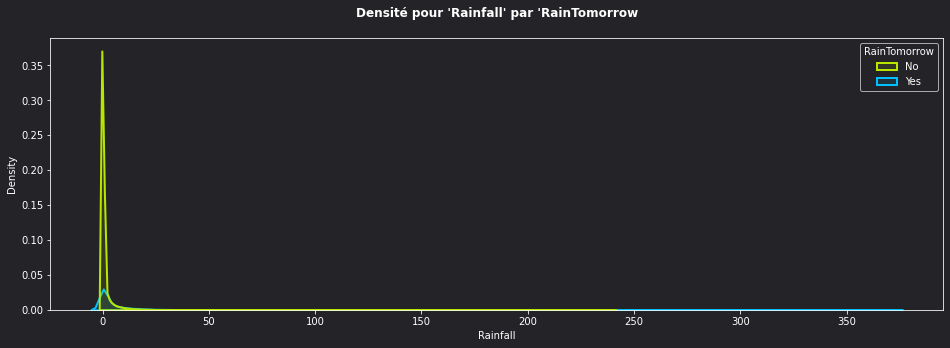

In [75]:
plt.figure(figsize=(16, 5))
plt.title(f"Densité pour 'Rainfall' par 'RainTomorrow\n")
sns.kdeplot(data=weather_data, x='Rainfall', hue='RainTomorrow', hue_order=['No', 'Yes'], alpha=.1, linewidth=2, fill=True, palette=palette_c)
plt.show()

Valeurs aberrantes par cible

In [38]:
# plt.figure(figsize=(14, 6), layout='tight')
# for i, col in enumerate(['CreditScore', 'Age']) :
#     plt.subplot(2, 1, i+1)
#     plt.title(f"Dispersion pour '{col}' par sortie ('RainTomorrow')\n")
#     sns.boxplot(data=weather_data.sort_values('RainTomorrow'), x=col, y='RainTomorrow', palette=palette_c)
#     plt.ylabel('')

# plt.show()

In [39]:
# plt.figure(figsize=(24, 4), layout='tight')
# for i, col in enumerate(continous) :
#     plt.subplot(1, 4, i+1)
#     plt.title(f"Cumulée pour '{col}' par sortie ('RainTomorrow')\n")
#     sns.ecdfplot(data=weather_data, x=col, hue='RainTomorrow', hue_order=['No', 'Yes'], palette=palette_c)

# plt.show()

In [77]:
for col in continous :
    display(weather_data[[col, 'RainTomorrow']].groupby('RainTomorrow').describe())

MinTemp                                                 
                 count       mean       std  min  25%   50%   75%   max
RainTomorrow                                                           
No            109854.0  11.897675  6.398699 -8.5  7.3  11.8  16.5  33.9
Yes            31702.0  13.186890  6.317971 -7.2  8.5  12.7  17.9  30.7

MaxTemp                                                  
                 count       mean       std  min   25%   50%   75%   max
RainTomorrow                                                            
No            110049.0  23.836247  7.059825 -4.8  18.6  23.3  28.8  48.1
Yes            31822.0  21.119100  6.911485 -4.1  16.1  20.2  25.8  46.8

Evaporation                                               
                   count      mean       std  min  25%  50%  75%    max
RainTomorrow                                                           
No               63491.0  5.734807  4.332891  0.0  2.8  5.0  7.6  145.0
Yes              17859.0  4.527779  3.469052  0.0  2.2  3.8  6.2   74.8

Sunshine                                               
                count      mean       std  min  25%  50%   75%   max
RainTomorrow                                                        
No            57556.0  8.546358  3.380298  0.0  6.6  9.4  11.0  14.5
Yes           16821.0  4.471761  3.359329  0.0  1.4  4.3   7.1  13.9

WindGustSpeed                                                    
                     count       mean        std  min   25%   50%   75%    max
RainTomorrow                                                                  
No                103488.0  38.288391  12.406522  6.0  30.0  37.0  44.0  126.0
Yes                29435.0  45.946764  15.717954  7.0  35.0  44.0  56.0  135.0

WindSpeed9am                                                  
                    count       mean       std  min  25%   50%   75%    max
RainTomorrow                                                               
No               109308.0  13.567314  8.627578  0.0  7.0  13.0  19.0  130.0
Yes               31537.0  15.508577  9.607733  0.0  9.0  15.0  20.0   87.0

WindSpeed3pm                                                  
                    count       mean       std  min   25%   50%   75%   max
RainTomorrow                                                               
No               108369.0  18.222804  8.455466  0.0  13.0  17.0  24.0  83.0
Yes               31194.0  20.078509  9.781914  0.0  13.0  19.0  26.0  87.0

Humidity9am                                                    
                   count       mean        std  min   25%   50%   75%    max
RainTomorrow                                                                
No              109076.0  66.217573  19.020703  0.0  55.0  67.0  80.0  100.0
Yes              31343.0  77.983314  16.108377  5.0  68.0  80.0  91.0  100.0

Humidity3pm                                                    
                   count       mean        std  min   25%   50%   75%    max
RainTomorrow                                                                
No              107670.0  46.510625  18.489476  0.0  33.0  47.0  60.0  100.0
Yes              30913.0  68.800019  19.037409  1.0  57.0  70.0  84.0  100.0

Pressure9am                                                \
                   count         mean       std    min     25%     50%   
RainTomorrow                                                             
No               99405.0  1018.595599  6.760700  982.9  1014.0  1018.5   
Yes              28774.0  1014.400000  7.304373  980.5  1009.6  1014.3   

                              
                 75%     max  
RainTomorrow                  
No            1023.1  1041.0  
Yes           1019.3  1039.5

Pressure3pm                                                \
                   count         mean       std    min     25%     50%   
RainTomorrow                                                             
No               99448.0  1016.113587  6.710292  983.2  1011.5  1016.0   
Yes              28764.0  1012.300820  7.331664  977.1  1007.4  1012.2   

                              
                 75%     max  
RainTomorrow                  
No            1020.6  1039.6  
Yes           1017.2  1036.9

Temp9am                                                  
                 count       mean       std  min   25%   50%   75%   max
RainTomorrow                                                            
No            109710.0  17.077001  6.522764 -7.2  12.4  16.9  21.7  40.2
Yes            31579.0  16.676598  6.378134 -5.5  11.9  16.1  21.1  37.5

Temp3pm                                                  
                 count       mean       std  min   25%   50%   75%   max
RainTomorrow                                                            
No            108332.0  22.402905  6.850466 -5.4  17.4  21.9  27.1  46.7
Yes            31135.0  19.197113  6.657981 -4.4  14.3  18.4  23.6  46.1

Dépendances dans les dispersions

In [42]:
if draw :
    gd = sns.PairGrid(weather_data[continous + ['RainTomorrow']], diag_sharey=False, corner=True, hue='RainTomorrow', hue_order=['No', 'Yes'], height=5, palette=palette_c)
    gd.map_lower(sns.kdeplot)
    gd.map_diag(sns.kdeplot)

**Observations**

> —
> 
> ❕ Les variables `Temp9am` et `Temp3pm`, `MinTemp` et `MaxTemp` et `Sunshine` présentent une très faible différence d'écart-types entre les 'Yes'/'No'. 
> 
> —

##### **3.2** - Variables quantitatives discrètes

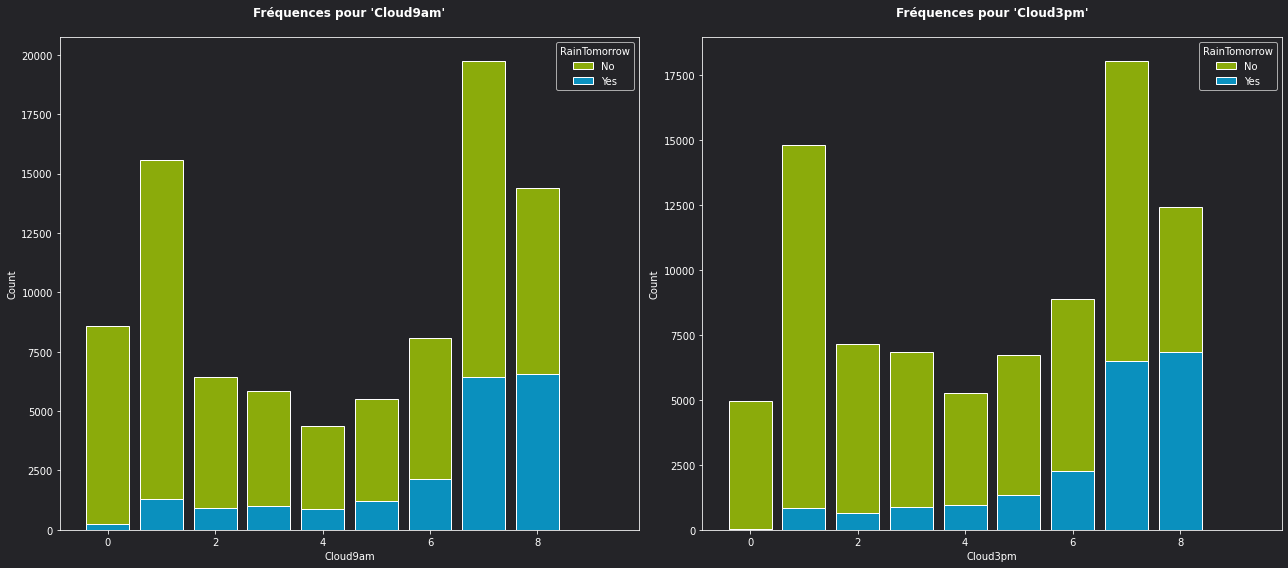

In [78]:
plt.figure(figsize=(18, 8), layout='tight')
for i, col in enumerate(discretes) :
    plt.subplot(1, 2, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=weather_data, x=col, hue='RainTomorrow', hue_order=['No', 'Yes'], multiple='stack', alpha=.7, discrete=True, shrink=.8, palette=palette_c)
plt.show()

**Observations**

> —
> 
> ❕ Les distributions des lendemains pluvieux pour `Cloud9am` et `Cloud3pm` ne présentent pas de grandes différences. Elles "raccontent" un peu la même chose.
> 
> —

##### **3.3** - Variables qualitatives

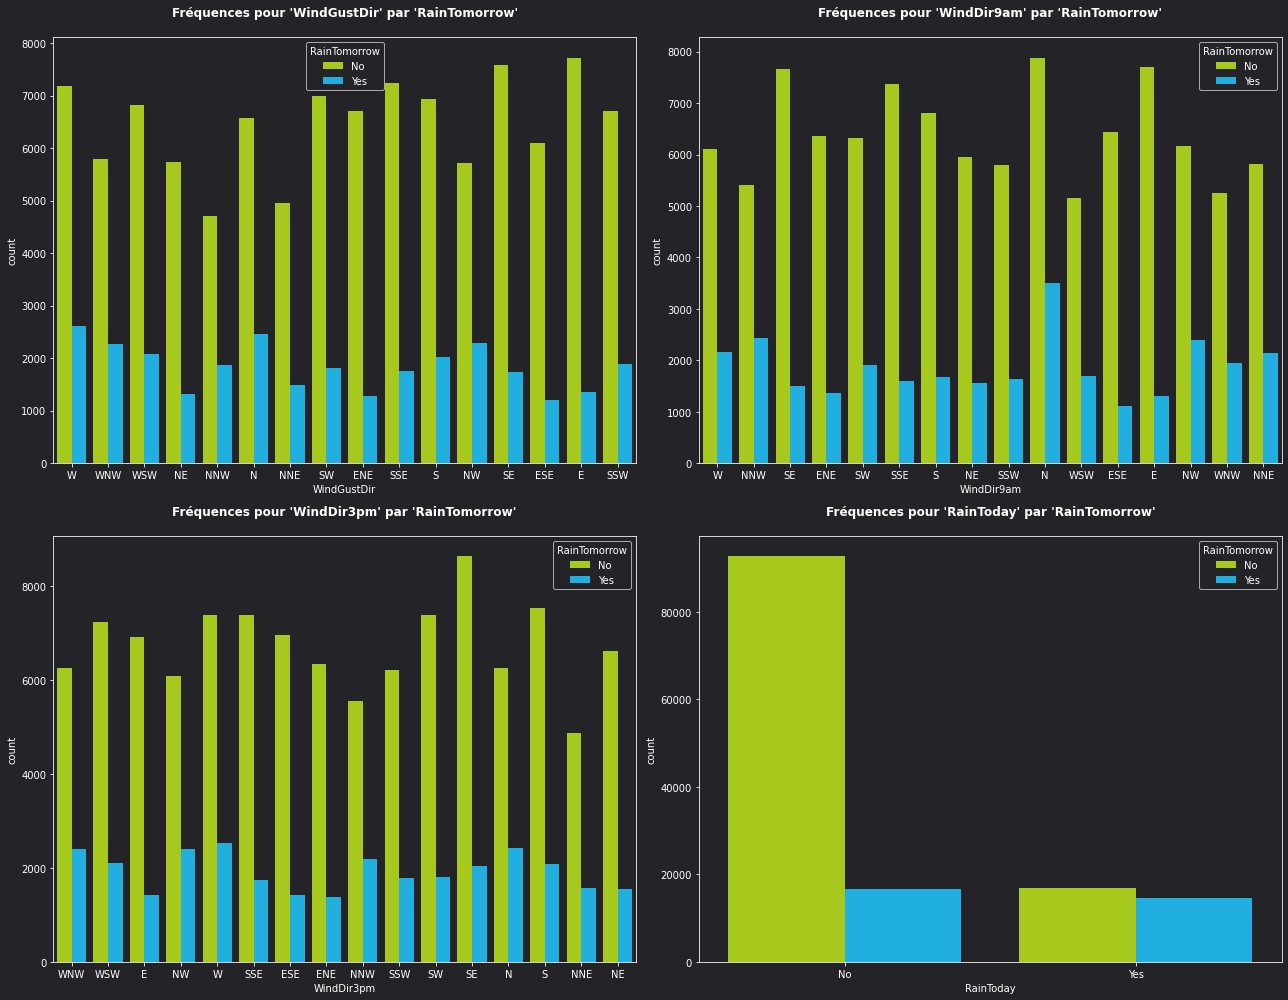

In [79]:
plt.figure(figsize=(18, 14), layout='tight')
for i, col in enumerate(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquences pour '{col}' par 'RainTomorrow'\n")
    sns.countplot(data=weather_data, x=col, hue='RainTomorrow', hue_order=['No', 'Yes'], palette=palette_c)
plt.show()

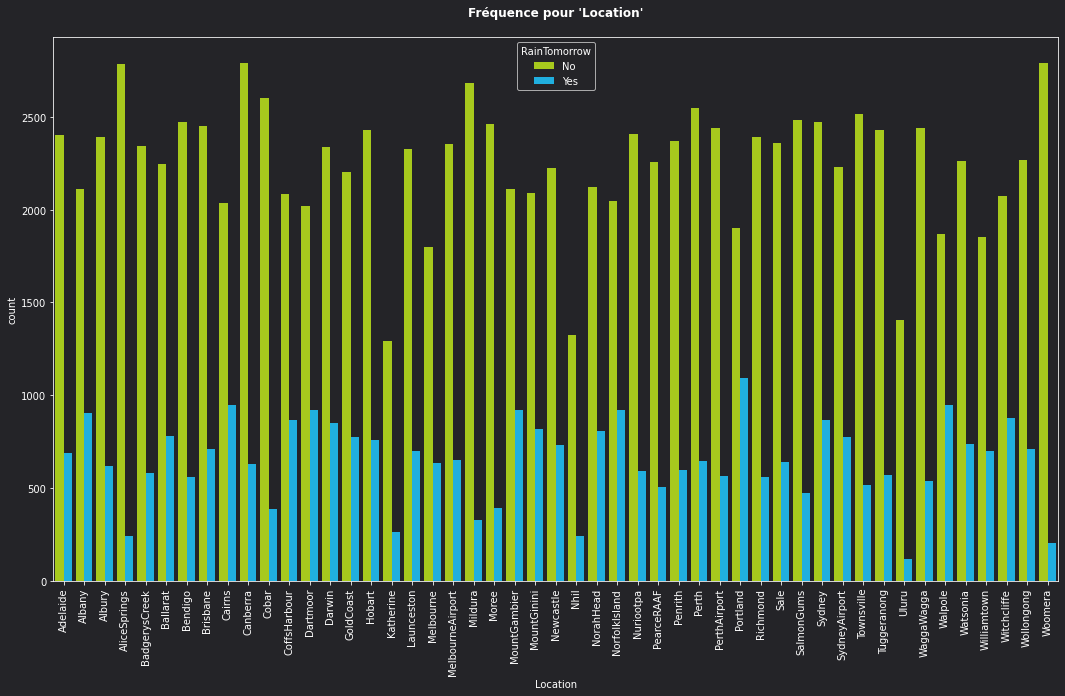

In [80]:
# (!) - Location
plt.figure(figsize=(18, 10))
plt.title(f"Fréquence pour 'Location'\n")
sns.countplot(data=weather_data.sort_values('Location'), x='Location', hue='RainTomorrow', hue_order=['No', 'Yes'], palette=palette_c)
plt.xticks(rotation=90)
plt.show()

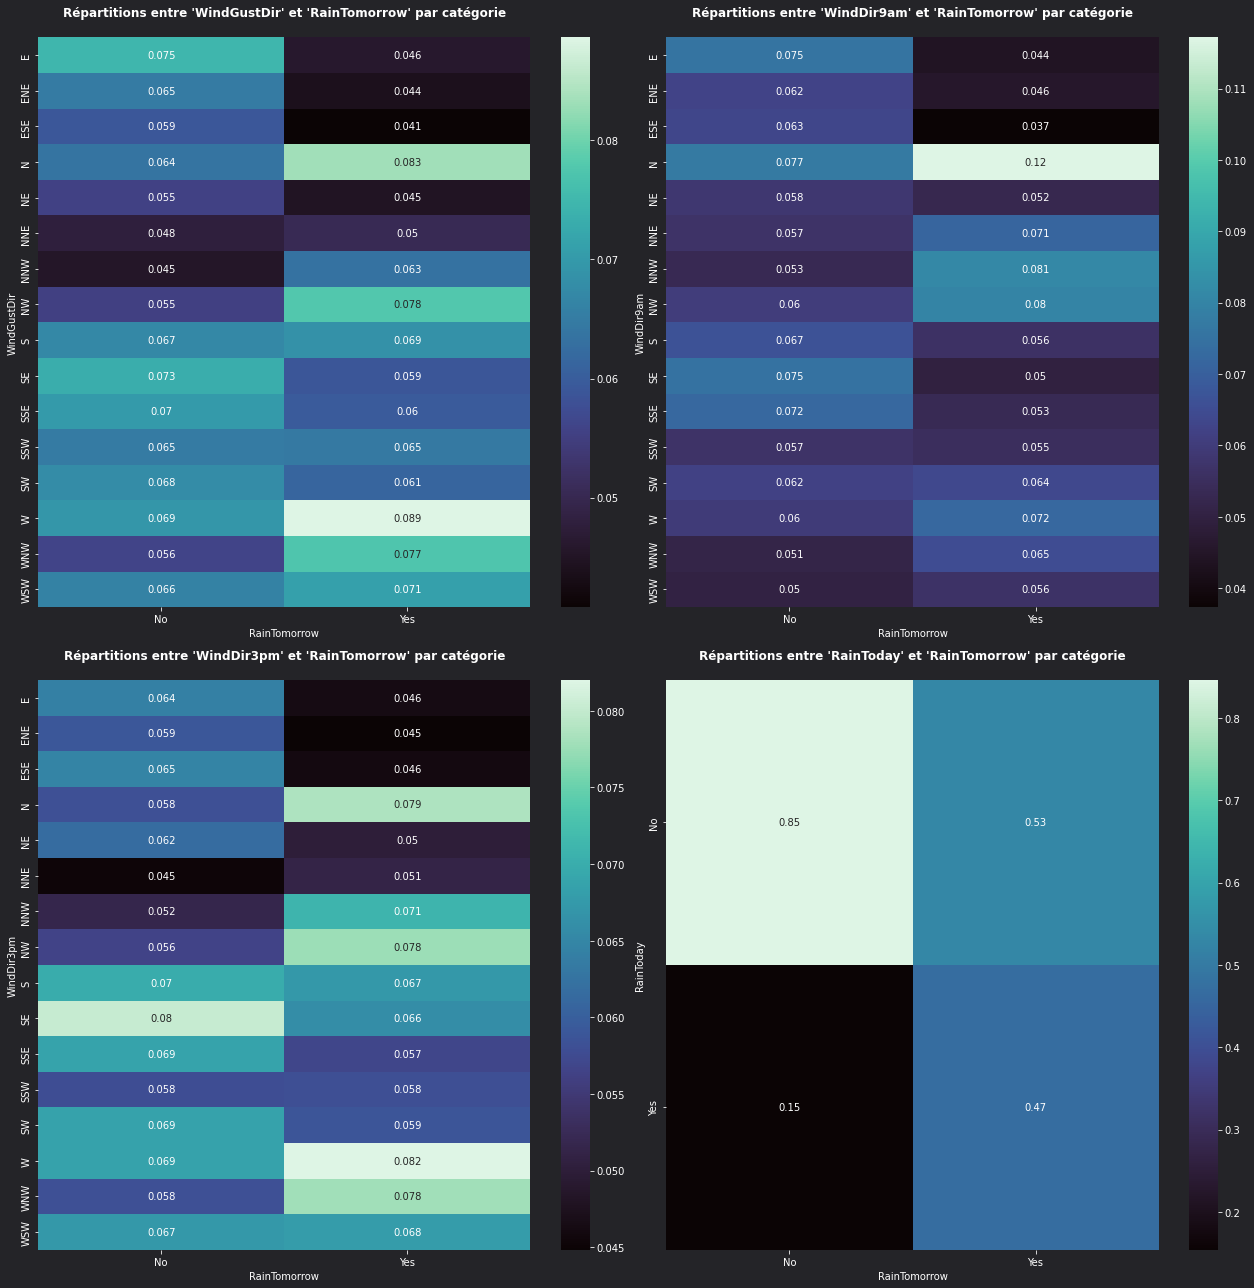

In [81]:
plt.figure(figsize=(18, 18), layout='tight')
for i, col in enumerate(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']) :
    ctb = pd.crosstab(weather_data[col], weather_data['RainTomorrow'], normalize='columns')
    plt.subplot(2, 2, i+1)
    plt.title(f"Répartitions entre '{col}' et 'RainTomorrow' par catégorie\n")
    sns.heatmap(ctb, annot=True, cmap='mako')
plt.show()

**Observations**

> —
> 
> ❕ 
> 
> —

##### **3.4** - Statistiques

In [116]:
# (!) - Adjustment for target computing 
no_yes_v = {
    'No': 0, 
    'Yes': 1
}
weather_df = weather_data.copy()
weather_df['RainTomorrow'] = weather_df['RainTomorrow'].map(no_yes_v)
weather_df['RainToday'] = weather_df['RainToday'].map(no_yes_v)

Liens de corrélation

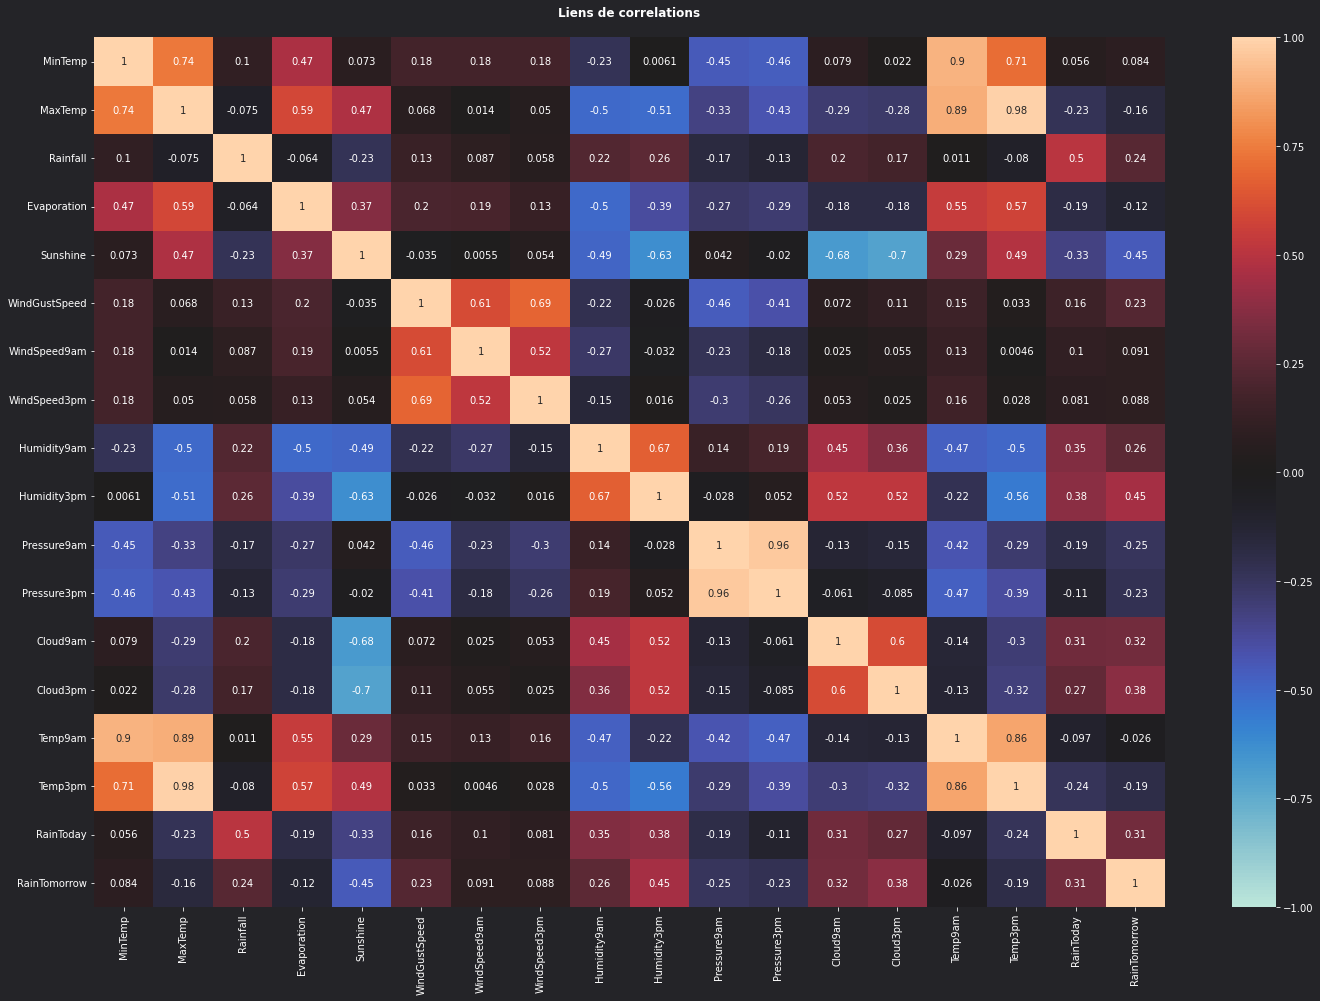

In [117]:
plt.figure(figsize=(24, 16))
plt.title("Liens de correlations\n")
sns.heatmap(weather_df.corr(method='pearson'), vmin=-1, vmax=1, cmap="icefire", annot=True)
plt.show()

In [118]:
# (!) - List low correlations with target
weather_corr = weather_df.corr(method='pearson')
hi_corr = weather_corr.loc[(weather_corr['RainTomorrow'] > -0.15) & (weather_corr['RainTomorrow'] < 0.15), 'RainTomorrow']
pd.DataFrame({
    'Correlations faibles': hi_corr.sort_values(ascending=False)
})

,Correlations faibles
WindSpeed9am,0.090995
WindSpeed3pm,0.087817
MinTemp,0.083936
Temp9am,-0.025691
Evaporation,-0.119285


In [155]:
# (!) - Ecart-type
weather_target_std = weather_df.groupby('RainTomorrow').std()
weather_target_std = weather_target_std.reset_index()

weather_target_std = weather_target_std.T

weather_target_std.rename(columns={0:'Ecart-Type RainTomorow No', 1:'Ecart-Type RainTomorow Yes'}, inplace=True)

weather_target_std

,Ecart-Type RainTomorow No,Ecart-Type RainTomorow Yes
RainTomorrow,0.000000,1.000000
MinTemp,6.398699,6.317971
MaxTemp,7.059825,6.911485
Rainfall,5.332200,14.318292
Evaporation,4.332891,3.469052
Sunshine,3.380298,3.359329
WindGustSpeed,12.406522,15.717954
WindSpeed9am,8.627578,9.607733
WindSpeed3pm,8.455466,9.781914
Humidity9am,19.020703,16.108377


In [162]:
# (!) - Synthesis
weather_target_corr = weather_df.corr(method='pearson')

weather_target_std['Correlations avec la cible'] = weather_target_corr['RainTomorrow']

# weather_target_std.loc[(weather_target_std['Correlations avec la cible'] < -0.15) | (weather_target_std['Correlations avec la cible'] > 0.15)].sort_values('Correlations avec la cible', ascending=False)

weather_target_std.sort_values('Correlations avec la cible')


,Ecart-Type RainTomorow No,Ecart-Type RainTomorow Yes,Correlations avec la cible
Sunshine,3.380298,3.359329,-0.450768
Pressure9am,6.760700,7.304373,-0.246371
Pressure3pm,6.710292,7.331664,-0.226031
Temp3pm,6.850466,6.657981,-0.192424
MaxTemp,7.059825,6.911485,-0.159237
Evaporation,4.332891,3.469052,-0.119285
Temp9am,6.522764,6.378134,-0.025691
MinTemp,6.398699,6.317971,0.083936
WindSpeed3pm,8.455466,9.781914,0.087817
WindSpeed9am,8.627578,9.607733,0.090995


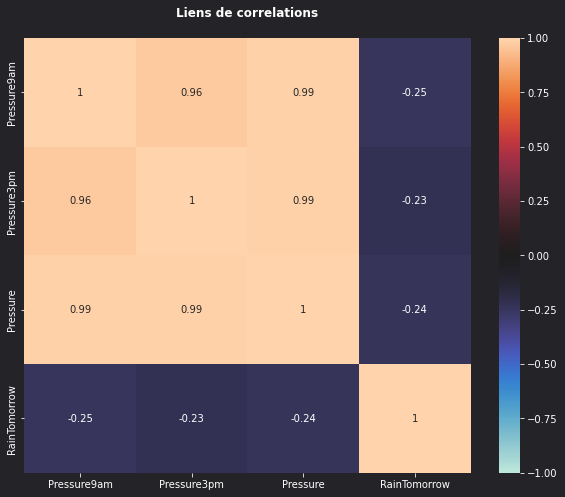

In [164]:
# (!) - Is correlation better with mean between 'Pressure9am' / 'Pressure3pm' ? 
weather_df['Pressure'] = np.nan
weather_df['Pressure'] = weather_df[['Pressure9am', 'Pressure3pm']].mean(axis=1)

plt.figure(figsize=(10, 8))
plt.title("Liens de correlations\n")
sns.heatmap(weather_df[['Pressure9am', 'Pressure3pm', 'Pressure', 'RainTomorrow']].corr(method='pearson'), vmin=-1, vmax=1, cmap="icefire", annot=True)
plt.show()

In [167]:
# (!) - Is correlation better with mean between Humidity9am / Humidity3pm ? Keep Humidity3pm ?
# weather_df['Humidity'] = np.nan
# weather_df['Humidity'] = weather_df[['Humidity9am', 'Humidity3pm']].mean(axis=1)

# plt.figure(figsize=(10, 8))
# plt.title("Liens de correlations\n")
# sns.heatmap(weather_df[['Humidity9am', 'Humidity3pm', 'Humidity', 'RainTomorrow']].corr(method='pearson'), vmin=-1, vmax=1, cmap="icefire", annot=True)
# plt.show()

In [166]:
# (!) - Is correlation better with mean between Cloud9am / Cloud3pm ? Keep Cloud3pm ?
# weather_df['Cloud'] = np.nan
# weather_df['Cloud'] = weather_df[['Cloud9am', 'Cloud3pm']].mean(axis=1)

# plt.figure(figsize=(10, 8))
# plt.title("Liens de correlations\n")
# sns.heatmap(weather_df[['Cloud9am', 'Cloud3pm', 'Cloud', 'RainTomorrow']].corr(method='pearson'), vmin=-1, vmax=1, cmap="icefire", annot=True)
# plt.show()

**Observations**

> — 
>
> ❕ Les corrélations de `Cloud9am` et `Cloud3pm` avec la cible sont presque semblables, et leurs distributions également. Une moyenne ne sera probablement pas nécesasire, et la variable `Cloud9am` pourrait tout simplement être supprimée. 
> 
> — 

---

### **4.** Finalisation

##### **4.1** - Conclusion

Il y a tellement de _Features_ ici qu'on se croirait dans une salade de fruits : ce n'est plus des _Features_ mais de la _conFeature_.

**Mutual Information**

[Feature Engineering - Kaggle](https://www.kaggle.com/code/ryanholbrook/mutual-information/tutorial)

_Locate features with the most potential_


A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

The metric we'll use is called **"mutual information"**. Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that **it can detect any kind of relationship**, while correlation **only detects linear relationships.**

Mutual information is a great general-purpose metric and especially useful at the start of feature development when you might not know what model you'd like to use yet. It is :
- easy to use and interpret,
- computationally efficient,
- theoretically well-founded,
- resistant to overfitting, and,
- able to detect any kind of relationship

Technical note: What we're calling uncertainty is measured using a quantity from information theory known as "entropy". The entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurance of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. Mutual information is how many questions you expect the feature to answer about the target.

**Notes**

Delete !
- 'Rainfall' (stat WTF)
- 'Sunshine' (48% nan, faible écart-type |e| Yes/No) 
- 'Evaporation' (43% nan, + Outliers and distrib WTF, Correlation limite, écart-type |e| 'Yes/No' assez limite) 
- 'Temp9am' (faible écart-type |e| Yes/No, Correlation faible)
- 'MinTemp' & 'MaxTemp' (faible écart-type |e| Yes/No)
- 'Humidity9am' (moins correlée avec la cible que 'Humidity3pm') 
- 'Cloud9am' (moins correlée avec la cible que 'Cloud3pm') 
- 'WinSpeep9am' & 'WinSpeep3pm' (moins correlée avec la cible et faible écart-type |e| Yes/No)


Merge / mean !
- 'Pressure9am' & 'Pressure3pm'

- 'Sydney' & 'SydneyAirport'
- 'Melbourne' & 'MelbourneAirport'


Transform !
- Date => Wet Season 0/1


Encode Ordinal !
- Cloud*
- 


**Preprocessing**

▶️ _Regrouper et moyenner_ OU drop les entrées **Sydney** et **SydneyAirport**, ainsi que **Melbourne** et **MelbourneAirport**.

▶️ _Moyenner_ les entrées horodatées **_9am** et **_3pm** et les **MinTemp** et **MaxTemp**

##### **4.2** - Traitement

**Préparation**

In [57]:
#  = weather_data.drop(['?', '?'], axis=1)

**Exportation**

In [58]:
# .to_csv('./_datasets/weather_data_prepare_1.csv', index=False)